**Vamos experimentar agora o algoritmo Decision Tree?**

In [33]:
!pip -q install yellowbrick

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

In [35]:
import pickle
with open('Dados/Restaurante.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

**Importando a biblioteca de ajuste de hiperparâmetros**

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
}

modelo = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=3,
    n_jobs=5,
    verbose=1,
)

In [38]:
modelo.fit(X_treino, y_treino)
print(modelo.best_params_)
print(modelo.best_score_)

Fitting 3 folds for each of 84 candidates, totalling 252 fits
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2'}
0.6666666666666666


**Agora precisamos rodar a árvore com os hiperparâmetros obtidos**

In [39]:
modelo= DecisionTreeClassifier(max_depth=10, criterion='gini', max_features=0.4)
modelo.fit(X_treino, y_treino)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,0.4
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None




> **Vamos testar o modelo?**



In [40]:

previsoes = modelo.predict(X_teste)

In [41]:
previsoes

array(['Nao', 'Sim', 'Nao'], dtype=object)



> **Será se o modelo acertou?**



In [42]:
y_teste

10    Nao
9     Nao
0     Sim
Name: Conclusao, dtype: object

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.3333333333333333

In [44]:
!pip install setuptools

In [45]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[1, 1],
       [1, 0]])

c:\Users\Otávio Monteiro\Faculdade\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


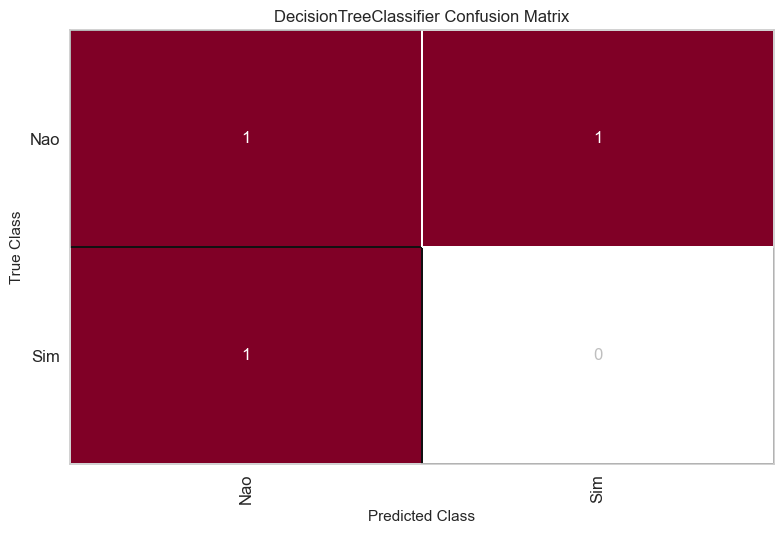

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [46]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)
cm.show()

In [47]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

         Nao       0.50      0.50      0.50         2
         Sim       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3



[Text(0.6, 0.9, 'Tempo <= 2.5\ngini = 0.494\nsamples = 9\nvalue = [4, 5]\nclass = Sim'),
 Text(0.4, 0.7, 'Cliente <= 0.5\ngini = 0.408\nsamples = 7\nvalue = [2, 5]\nclass = Sim'),
 Text(0.5, 0.8, 'True  '),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Nao'),
 Text(0.6, 0.5, 'Chuva <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]\nclass = Sim'),
 Text(0.4, 0.3, 'Bar <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Sim'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Nao'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Sim'),
 Text(0.8, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Sim'),
 Text(0.8, 0.7, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Nao'),
 Text(0.7, 0.8, '  False')]

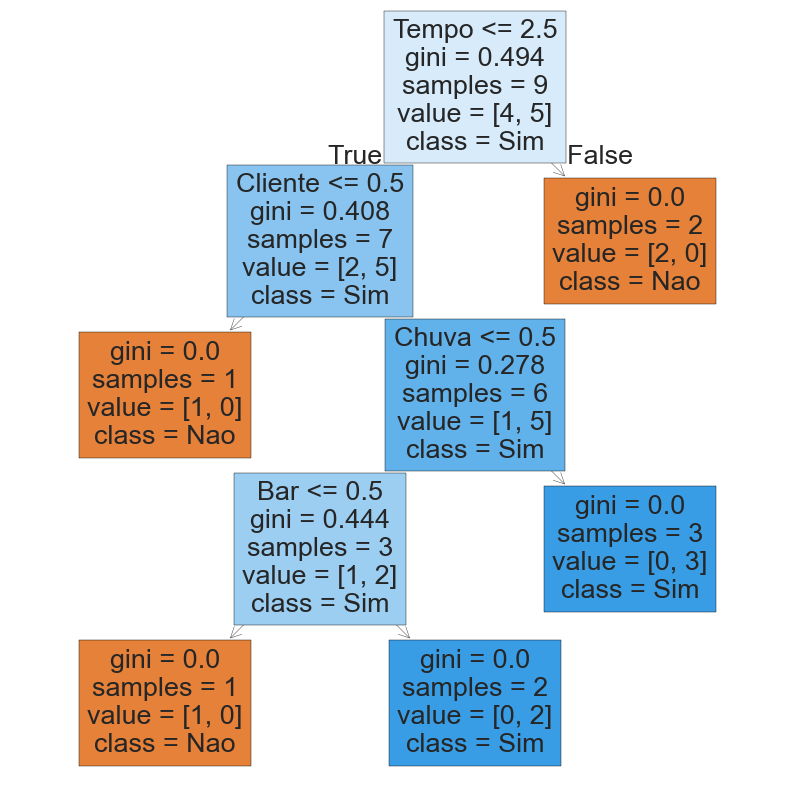

In [48]:
from sklearn import tree
previsores = X_treino.columns
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(modelo, feature_names=previsores, class_names=modelo.classes_.astype(str), filled=True)